# Software Evolution Analysis





## My Favorite Metaphors for Software Emphasize Change

** Performance Art **
- art: because it's creative
- performance: you can't put it in a frame 
- => *advice:* if you ever create a cool innovative software then **make a screencast** about it


** A Garden **
- It needs somebody to always tend to it


Although even architecture, in the long term changes [Brand]


[Brand] - *How Buildings Learn*. Steward Brand
- The Long Now Foundation - Podcast



## Software Must Evolve 
Or the **first law of software evolution** of Manny Lehmann [1]

> A program that is used in a real-world environment must change, or become progressively less useful in that environment. (Lehman's Law of Continuing Change)


Lehman proposed the laws about e-type systems:
  - an e-type system is *embedded* in the real world
  - and since the real world always changes... 
      - even if it weren't, the software ecosystem eventually changes [2] 
      - e.g. javascript packages, etc.

        
[1] Lehman, Belady. Program Evolution: Processes of Software Change, London Academic Press, London, 1985

[2] We'll talk more about ecosystems in the ASE course

## En#*0py Happens!

Manny Lehmann's **Law of Increasing Entropy**: 

> As a program evolves, it becomes more complex, and extra resources are needed to preserve and simplify its structure.


David Parnas's **Software Aging** [1]

> Programs, like people, get old. 

- We can’t prevent aging, but 
  - we can understand its causes, 
  - take steps to limits its effects, 
  - temporarily reverse some of the damage it has caused, 
  - and prepare for the day when the software is no longer viable

[1] Software Aging. David Lorge Parnas, https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=296790



## Although None Of This Would Surprise Heraclitus  

![](images/heraclitus.png)

*what would suprise him, however is that...*

## VCS Capture The History of Software Change

VCS = version control system 


Over the last two decades **we have seen increases in**...
  - **popularity of version control systems**
https://trends.google.com/trends/explore?date=all&q=git,svn,software%20architecture,mercurial
    - it's even funny for us to think that people used to email files around to collaborate
    - one of the many practices that we, software engineers, have been teaching the rest of the world



- **knowledge of how to manage versions**
  - branching strategies
  - integration with CI
  - semantic versioning 



*How to integrate this information in AR?...*


## We Can Data-Mine the VCS to Understand System Evolution

 
 By data mining the version repository we can find: 

  - places in the code which are high-risk (because they were risky in the past)
    - + linking with issue tracker info

  - parts of the system that need refactoring (study of Hitesh Sajnani)
  
  - navigation suggestions (e.g. Mylar for Eclipse)


Today: 
  1. entities in the codebase where most effort was invested
  1. invisible dependencies between files (e.g. logical coupling)
  
  
  
 






## 1. Evolutionary Hotspots 

=(*def*) **code entities where most effort was invested **


Assumption: effort is proportional to architectural relevance


Why? 
- Philosophycally
 > *"The value of anything is proportional to time invested in it."* (M. Lungu)
 
 
- Practically:
  - high *churn* (change density) predicts bugs better than size [...]
  - studies observe correlation between churn and complexity metrics [...]
  - it's likely that they'll require more effort in the future (e.g. yesterday's weather [Girba et al.])
    
    
- Pragmatically:
  - can be detected with **language independent analysis** (which is good for polyglot systems)


  
  



### Evolutionary Hotspots In Practice

Challenges / Implementation Details: 
- how to measure effort invested? 
- what are the entities (files, aggregates?)
- on what period is the study performed 
  - results will likely differ for periods




### Example Analysis

VCS: Git

Period of study: whole history

Entities: files (+aggregation to modules)

Invested effort: number of commits

Case Study: Zeeguu-Core

Toolbox: Python + PyDriller


In [1]:
import sys

!{sys.executable} -m pip install pydriller
!{sys.executable} -m pip install gitpython

You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from pydriller import RepositoryMining
REPO_DIR = '/Users/mircea/Zeeguu-Core/'


#### Every commit is modelled as "multiple modifications" each one involving a filename

In [3]:
for commit in RepositoryMining(REPO_DIR).traverse_commits():
    print("commit" + str(commit))
    for m in commit.modifications:
        print(
            "- Author {}".format(commit.author.name),
            " modified {}".format(m.filename),
            " with a change type of {}".format(m.change_type.name),
            " and the complexity is {}".format(m.complexity)
        )


commit<pydriller.domain.commit.Commit object at 0x10a744630>
- Author Mircea Lungu  modified LICENSE  with a change type of ADD  and the complexity is 0
- Author Mircea Lungu  modified README.md  with a change type of ADD  and the complexity is 0
- Author Mircea Lungu  modified de-test.txt  with a change type of ADD  and the complexity is 0
- Author Mircea Lungu  modified de.txt  with a change type of ADD  and the complexity is 0
- Author Mircea Lungu  modified fr.txt  with a change type of ADD  and the complexity is 0
- Author Mircea Lungu  modified it.txt  with a change type of ADD  and the complexity is 0
- Author Mircea Lungu  modified nl.txt  with a change type of ADD  and the complexity is 0
- Author Mircea Lungu  modified sources.txt  with a change type of ADD  and the complexity is 0
- Author Mircea Lungu  modified setup.py  with a change type of ADD  and the complexity is 0
- Author Mircea Lungu  modified test.py  with a change type of ADD  and the complexity is 0
- Author Mir

#### Intermezzo: Complexity 

Different kinds of metrics
- network analysis based 
  - HITS -- hubs and authorities [1]
  - PageRank [2]

- source code based
  - cyclomatic complexity (McCabe) [3]
    - number of linearly independent code paths through source code
    - often used in quality: too much complexity is a bad thing
    - hidden partially by polymorphism
    

[1] Hubs / Authorities: https://en.wikipedia.org/wiki/HITS_algorithm

[2] *Ranking software artifacts*. F Perin, L Renggli, and J Ressia

[3] Cyclomatic Complexity: https://en.wikipedia.org/wiki/Cyclomatic_complexity


#### Let's Count the Modifications for Each File

In [4]:
from collections import defaultdict

commit_counts = defaultdict(int)

for commit in RepositoryMining(REPO_DIR).traverse_commits():
    for modification in commit.modifications:
        try:
            commit_counts [modification.new_path] += 1
        except: 
            pass

sorted(commit_counts.items(), key=lambda x: x[1], reverse=True)[:42]


[(None, 176),
 ('zeeguu/model/bookmark.py', 83),
 ('zeeguu/model/user.py', 69),
 ('zeeguu/model/article.py', 49),
 ('zeeguu/content_recommender/mixed_recommender.py', 47),
 ('zeeguu/model/__init__.py', 40),
 ('README.md', 36),
 ('zeeguu/model/feed.py', 36),
 ('zeeguu/populate.py', 35),
 ('.travis.yml', 35),
 ('setup.py', 31),
 ('zeeguu/content_retriever/article_downloader.py', 29),
 ('zeeguu/model/language.py', 26),
 ('zeeguu/model/url.py', 25),
 ('zeeguu/model/user_activitiy_data.py', 25),
 ('tests_core_zeeguu/test_words_to_study.py', 24),
 ('tests_core_zeeguu/test_bookmark.py', 22),
 ('tests_core_zeeguu/test_retrieve_and_compute.py', 22),
 ('tools/map_article_words.py', 22),
 ('zeeguu_core/model/user.py', 22),
 ('zeeguu/model/user_reading_session.py', 20),
 ('tests_core_zeeguu/model_test_mixin.py', 19),
 ('zeeguu/temporary/default_words.py', 19),
 ('zeeguu/algos/algo_service.py', 19),
 ('zeeguu/language/retrieve_and_compute.py', 18),
 ('zeeguu_core/content_retriever/article_downloade

#### Problem: many `__init__.py` files in our system but only one in the counts!

- what's the full file name? 

- looking at the documentation of PyDriller [1] we see that there's two:
  - old_path
  - new_path

- why? 
- which one should we be using? 

[1] https://pydriller.readthedocs.io/en/latest/commit.html


#### Lesson: to track full paths  we need to also track *individual file evolution*

In [5]:
from pydriller import ModificationType

commit_counts = {}

for commit in RepositoryMining(REPO_DIR).traverse_commits():
    for modification in commit.modifications:
        
        new_path = modification.new_path
        old_path = modification.old_path
        
        try:

            if modification.change_type == ModificationType.RENAME:
                commit_counts[new_path]=commit_counts.get(old_path,0)+1
                commit_counts.pop(old_path)

            elif modification.change_type == ModificationType.DELETE:
                commit_counts.pop(old_path, '')

            elif modification.change_type == ModificationType.ADD:
                commit_counts[new_path] = 1

            else: # modification to existing file
                    commit_counts [old_path] += 1
        except Exception as e: 
            print("something went wrong with: " + str(modification))
            pass
        
sorted(commit_counts.items(), key=lambda x:x[1], reverse=True)


something went wrong with: <pydriller.domain.commit.Modification object at 0x10a9c9320>
something went wrong with: <pydriller.domain.commit.Modification object at 0x10a7e0fd0>
something went wrong with: <pydriller.domain.commit.Modification object at 0x10a7e0a58>
something went wrong with: <pydriller.domain.commit.Modification object at 0x10a7e0390>
something went wrong with: <pydriller.domain.commit.Modification object at 0x10a7e07b8>
something went wrong with: <pydriller.domain.commit.Modification object at 0x10a7e07f0>
something went wrong with: <pydriller.domain.commit.Modification object at 0x10a7e0470>
something went wrong with: <pydriller.domain.commit.Modification object at 0x10a7e0e80>
something went wrong with: <pydriller.domain.commit.Modification object at 0x10a7e0438>
something went wrong with: <pydriller.domain.commit.Modification object at 0x10a7e0240>
something went wrong with: <pydriller.domain.commit.Modification object at 0x10a7e0550>
something went wrong with: <pydr

[('zeeguu_core/model/user.py', 91),
 ('zeeguu_core/model/bookmark.py', 89),
 ('zeeguu_core/content_recommender/mixed_recommender.py', 56),
 ('zeeguu_core/model/article.py', 52),
 ('zeeguu_core/content_retriever/article_downloader.py', 46),
 ('zeeguu_core/model/feed.py', 46),
 ('zeeguu_core/model/__init__.py', 44),
 ('README.md', 36),
 ('.travis.yml', 35),
 ('zeeguu_core/model/language.py', 34),
 ('setup.py', 31),
 ('zeeguu_core/word_scheduling/arts/bookmark_priority_updater.py', 29),
 ('zeeguu_core/model/url.py', 28),
 ('zeeguu_core/model/user_reading_session.py', 28),
 ('zeeguu_core/model/user_activitiy_data.py', 27),
 ('zeeguu_core/language/strategies/flesch_kincaid_difficulty_estimator.py',
  26),
 ('tools/map_article_words.py', 22),
 ('run_tests.sh', 18),
 ('zeeguu_core/__init__.py', 17),
 ('tools/sql/search_db_migration.SQL', 15),
 ('tools/saturate_word_interaction_history.py', 15),
 ('zeeguu_core/language/strategies/frequency_difficulty_estimator.py', 15),
 ('zeeguu_core/model/co

#### Aggregating to module level



In [6]:
from code.basic_abstraction import (
    module_from_path, 
    top_level_module
)

module_activity = defaultdict(int)

for path, count in commit_counts.items():
    if ".py" in str(path):
        l2_module = top_level_module(module_from_path(path), 2)
        module_activity[l2_module] += count

sorted(module_activity.items(), key=lambda x: x[1], reverse=True)



[('zeeguu_core.model', 736),
 ('zeeguu_core.word_scheduling', 88),
 ('zeeguu_core.language', 86),
 ('zeeguu_core.content_retriever', 67),
 ('zeeguu_core.content_recommender', 57),
 ('zeeguu_core_test.rules', 40),
 ('tools.migrations', 32),
 ('setup', 31),
 ('zeeguu_core.util', 23),
 ('tools.map_article_words', 22),
 ('test.rules', 19),
 ('zeeguu_core.__init__', 17),
 ('tools.saturate_word_interaction_history', 15),
 ('zeeguu_core_test.test_data', 12),
 ('zeeguu_core.bookmark_quality', 12),
 ('tools.fill_historical_reading_sessions', 11),
 ('zeeguu_core.constants', 11),
 ('tools.recompute_recommender_cache', 9),
 ('analyses.recent_activity', 9),
 ('tools.feed_retrieval', 8),
 ('zeeguu_core_test.model_test_mixin', 7),
 ('tools.tag_existing_articles', 6),
 ('tools.fill_article_ids', 6),
 ('tools.fill_historical_exercise_sessions', 5),
 ('zeeguu_core_test.test_bookmark', 5),
 ('zeeguu_core_test.tests_difficulty_estimator_strategies', 5),
 ('zeeguu_core.emailer', 5),
 ('tools.add_standard_t

In [7]:
most_active_modules = sorted(module_activity.items(), key=lambda x: x[1], reverse=True)

top_most_active_modules= [each[0] for each in most_active_modules][:5]
top_most_active_modules


['zeeguu_core.model',
 'zeeguu_core.word_scheduling',
 'zeeguu_core.language',
 'zeeguu_core.content_retriever',
 'zeeguu_core.content_recommender']

#### Architectural View: Relationships Between Evolutionary Hotspots


In [8]:
# packages required for drawing
import sys
!{sys.executable} -m pip install networkx --upgrade
!{sys.executable} -m pip install matplotlib

Requirement already up-to-date: networkx in /Users/mircea/anaconda/envs/py3/lib/python3.6/site-packages
Requirement already up-to-date: decorator>=4.3.0 in /Users/mircea/anaconda/envs/py3/lib/python3.6/site-packages (from networkx)
You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
def system_module(m):
    return m in top_most_active_modules

def module_size(m):
    return 30*module_activity[m]

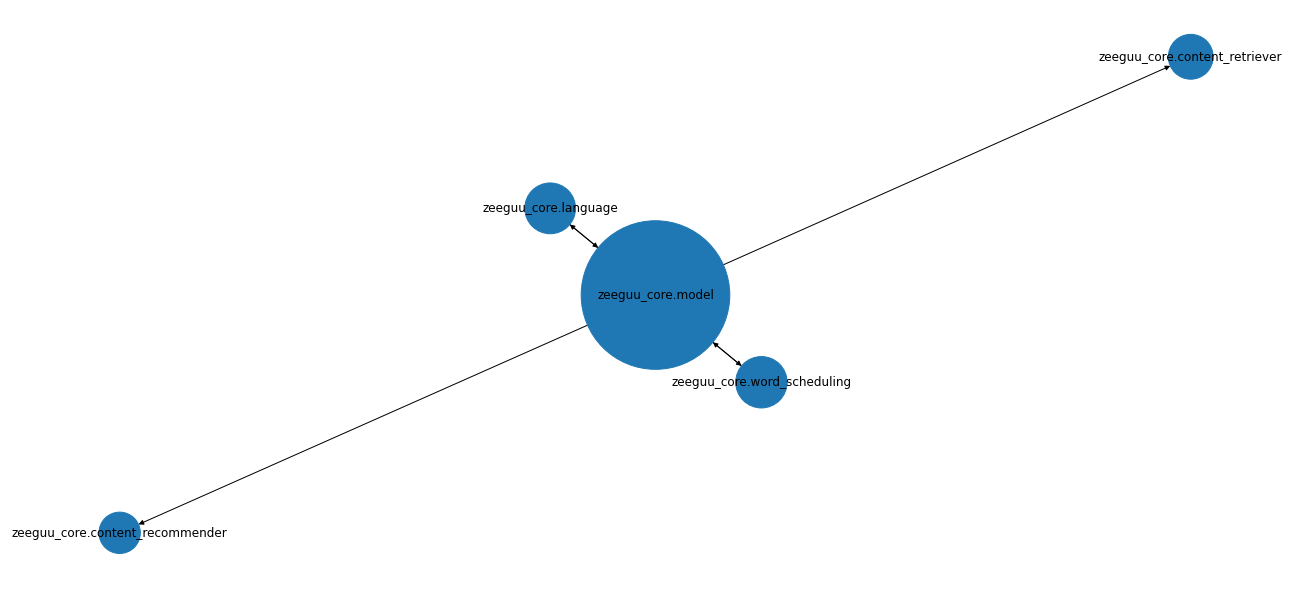

In [11]:
from code.basic_abstraction import (
    dependencies_graph, 
    draw_graph_with_weights,
    top_level_module,
    abstracted_to_top_level)

directed = dependencies_graph(REPO_DIR)
directedAbstracted = abstracted_to_top_level(directed, system_module)

draw_graph_with_weights(directedAbstracted, module_size, (18,8))

### Stepping Back

We used Git but similar for any VCS 

Alternative tools for VCS Analysis: 

- git log + Unix Command Line tools (See tutorials by Spinellis, Helge in ASE, or Tornhill)
  
- your IDE (e.g. integrated git blame, visual diff, etc.)

- Any others...?

Definition of most active can be tuned based on needs
- could be log-weighted towards recency (discard past changes more)
- could be used to replay the history of the system by looking at non-overlapping time windows


### Limitations

- ignores developer styles
  - the guy with micro-commits vs. the girl who like to commit infrequently but large chunks of code
  
- might detect files that `README.md`, or `LICENSE.md` changes the most
  - can be combined with static complexity metrics [1]


[1] *Source Code as a Crime Scene*. A. Tornhill




## 2. Dependency Extraction: Logical Coupling

** Logical coupling** detects when **two sub-systems** change together **frequently**
- The more they change together, the more likely they are dependent
- Can capture dependencies that are not detectable by static/dynamic analysis
  - e.g. ? 


Introduced in the context of an industrial case study [1]

[1] Detection of Logical Coupling Based on Product Release History, Gall et al., ’98

### Logical Coupling: The Details...


- What are sub-systems (files? folders? packages?)
- What does it mean change together (same commit? sliding time window?)
- The threshold for "frequently" (e.g. *75% of the commits min 10*, etc.)



### Advantages of Logical Coupling

Language Independent

Complements some Structural / Dynamic Analysis disadvantages: 
- can not capture all the situations (i.e. writing to a file, reading from a file)
- does not work with documents that are not source code (e.g. XML files)


## Evolution Analysis Beyond Architecture Recovery

- improved developer tools
  - recording and replaying software evolution (e.g. "Replay" for Eclipse)
    - fine-grained (method-level) evolution monitoring (Robbes et al.)


- software quality evaluation


- *program comprehension* when first encountering a new system



- Mining software ecosystems

  - kinds of changes that are most likely to introduce bugs 
  - developer strategies in front of API deprecation
